In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # some imports to set up plotting
import seaborn as sns # pip install seaborn

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [4]:
pd.read_csv('beauty.csv', nrows=2)

,wage;exper;union;goodhlth;black;female;married;service;educ;looks
0,5.73;30;0;1;0;1;1;1;14;4
1,4.28;28;0;1;0;1;1;0;12;3


In [7]:
data = pd.read_csv('beauty.csv', sep=';')
data.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


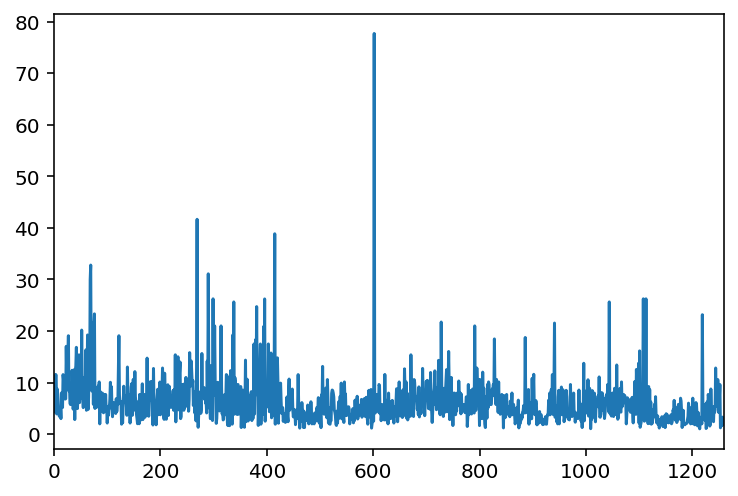

In [9]:
data['wage'].plot();

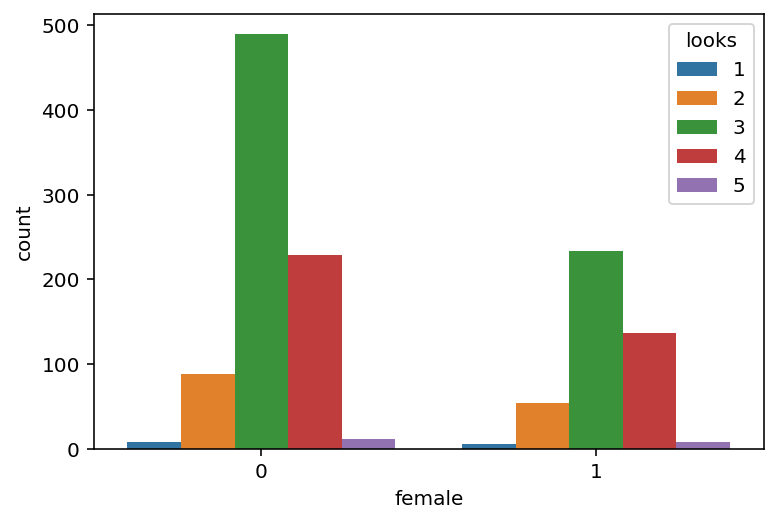

In [13]:
sns.countplot(x='female', hue='looks', data=data);

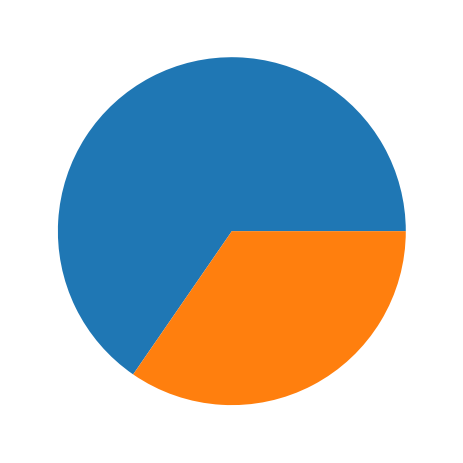

In [15]:
plt.pie(data.groupby('female')['wage'].count()); # круговая диаграмми (pie)

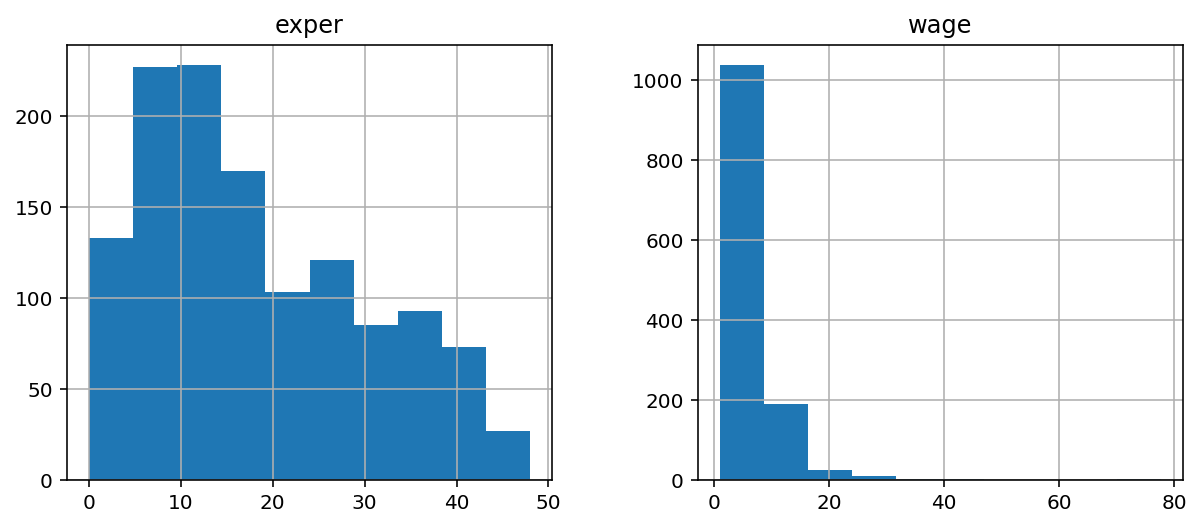

In [19]:
features = ['wage', 'exper']
df[features].hist(figsize=(10, 4));

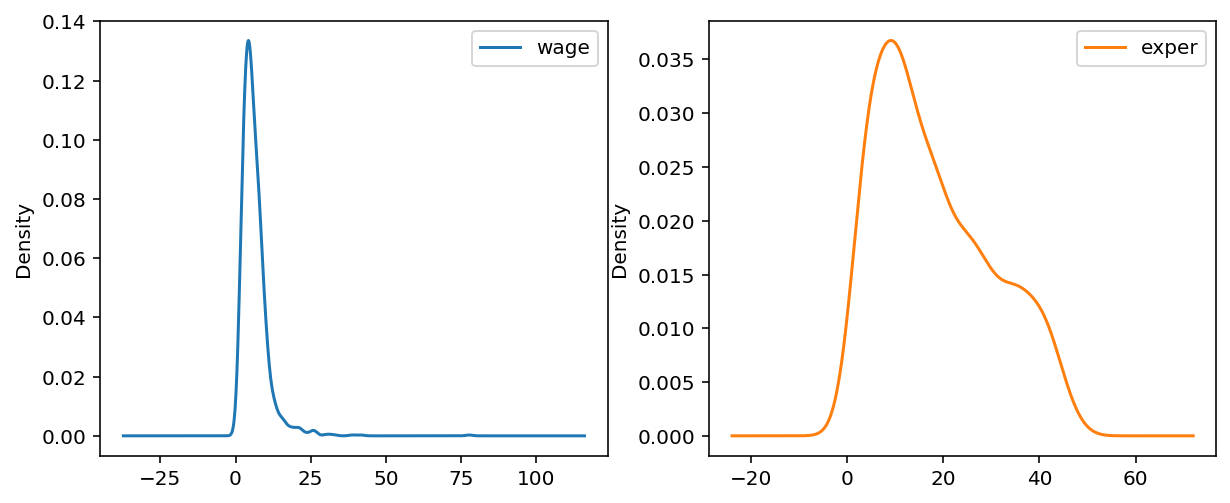

In [21]:
df[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

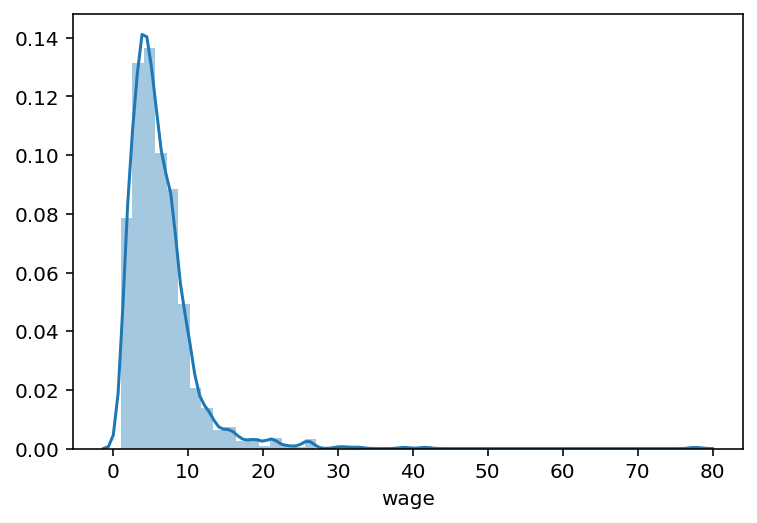

In [24]:
sns.distplot(df['wage']);

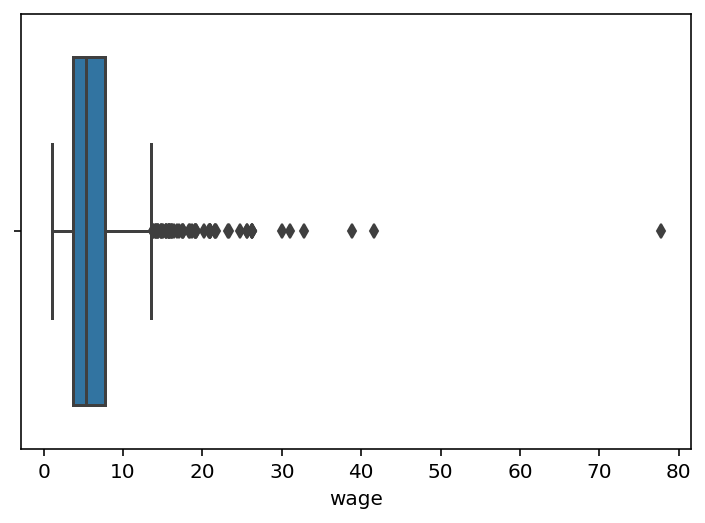

In [25]:
sns.boxplot(x='wage', data=df);

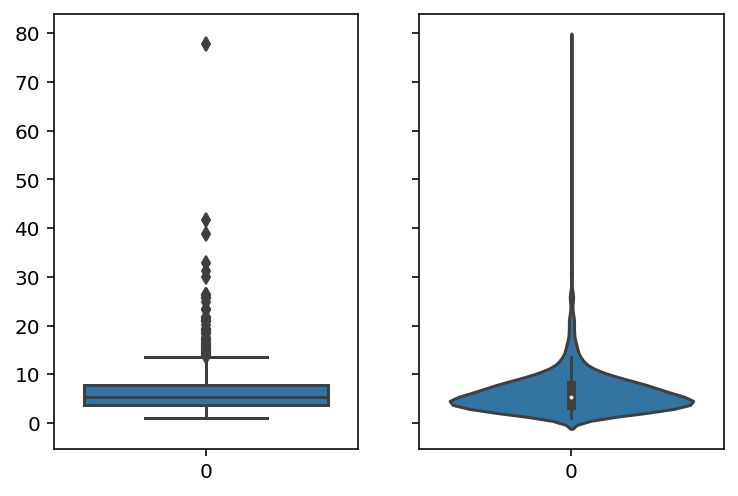

In [26]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['wage'], ax=axes[0]);
sns.violinplot(data=df['wage'], ax=axes[1]);

# Домашнее задание:
1) взять данные отсюда: https://github.com/Laggg/data--for--students (flight_delays.csv)

2) задачи на исследование данных:

    -
    -
    -

In [24]:
import pandas as pd
pd.read_csv('flight_delays.csv').head(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
5,c-8,c-3,c-4,1918,NW,MEM,MCO,683,N
6,c-1,c-27,c-4,754,DL,PBI,LGA,1035,N
7,c-4,c-29,c-6,635,OH,MSP,CVG,596,N
8,c-7,c-28,c-5,735,AA,ONT,DFW,1189,N
9,c-6,c-20,c-2,2029,OO,DEN,PSC,853,N
